In [1]:
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import gensim as gs
import sklearn.cluster as cluster
import string as st
from gensim.models import Word2Vec
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from kneed import KneeLocator
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize as stt
from nltk.tokenize import word_tokenize as wtt
from pandas.core.dtypes.common import is_numeric_dtype as is_num
import plotly.express as px
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification as mc
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [3]:
df = pd.read_excel('Heart Disease.xlsx')

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.shape

(319795, 18)

In [9]:
df.duplicated().sum()

18078

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [12]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.048653,-0.058406,-0.117078,1.000000


In [14]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# VISUALIZATION

# Barplot

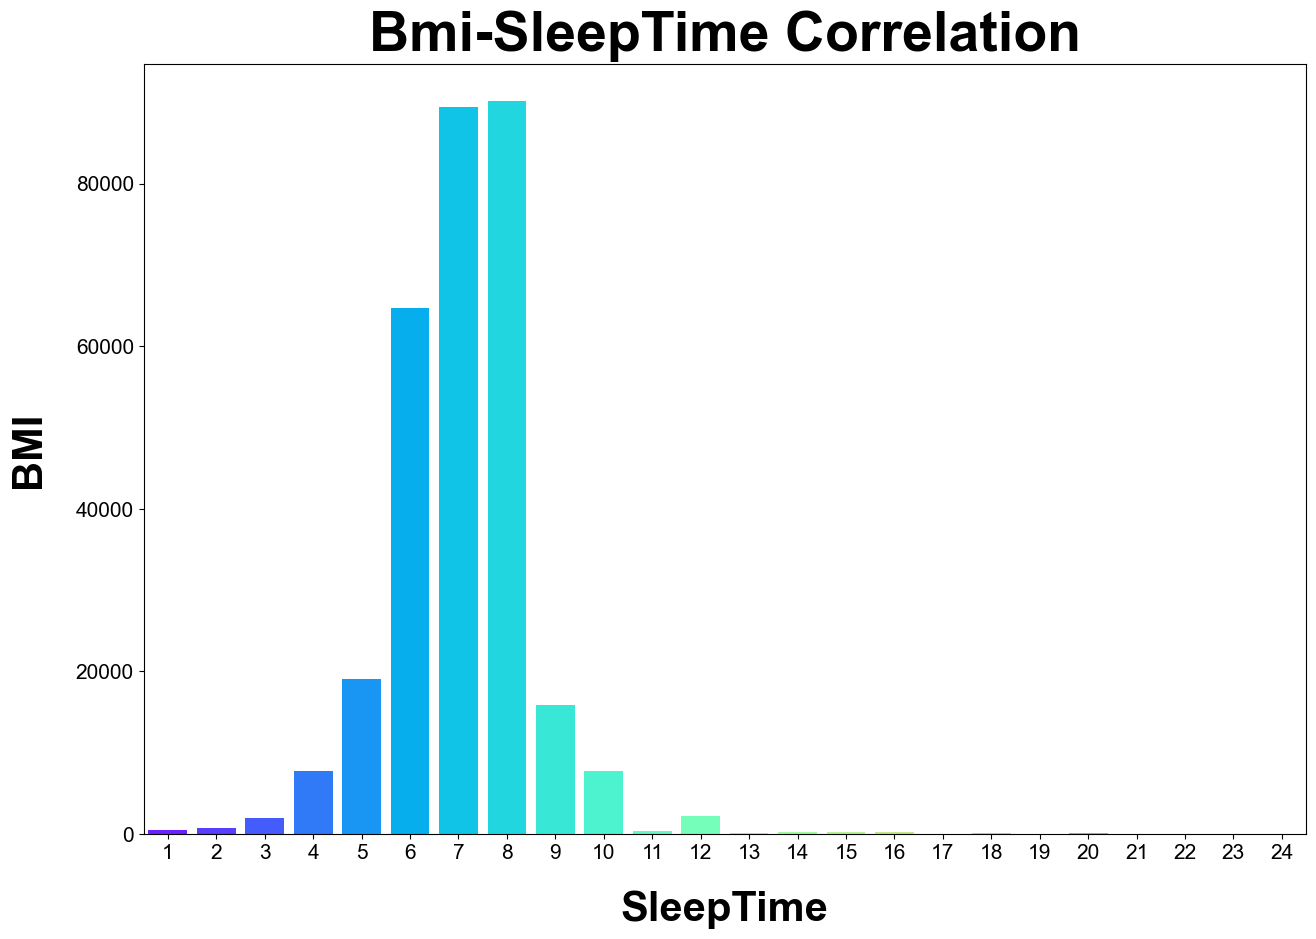

In [15]:
plt.figure(figsize = (15, 10))
sns.barplot(x = df['SleepTime'].value_counts().index, y = df['SleepTime'].value_counts().values, palette = 'rainbow', saturation = 1.0, errcolor = 'black', errwidth = 2.0, capsize = 0.2).set_title('Bmi-SleepTime Correlation', fontsize = 40, fontweight = 'bold', fontname = 'Arial', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('SleepTime', fontsize = 30, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.ylabel('BMI', fontsize = 30, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.xticks(fontsize = 15,fontname = 'Arial', color = 'black')
plt.yticks(fontsize = 15,fontname = 'Arial', color = 'black')
plt.show()

# Box Plot

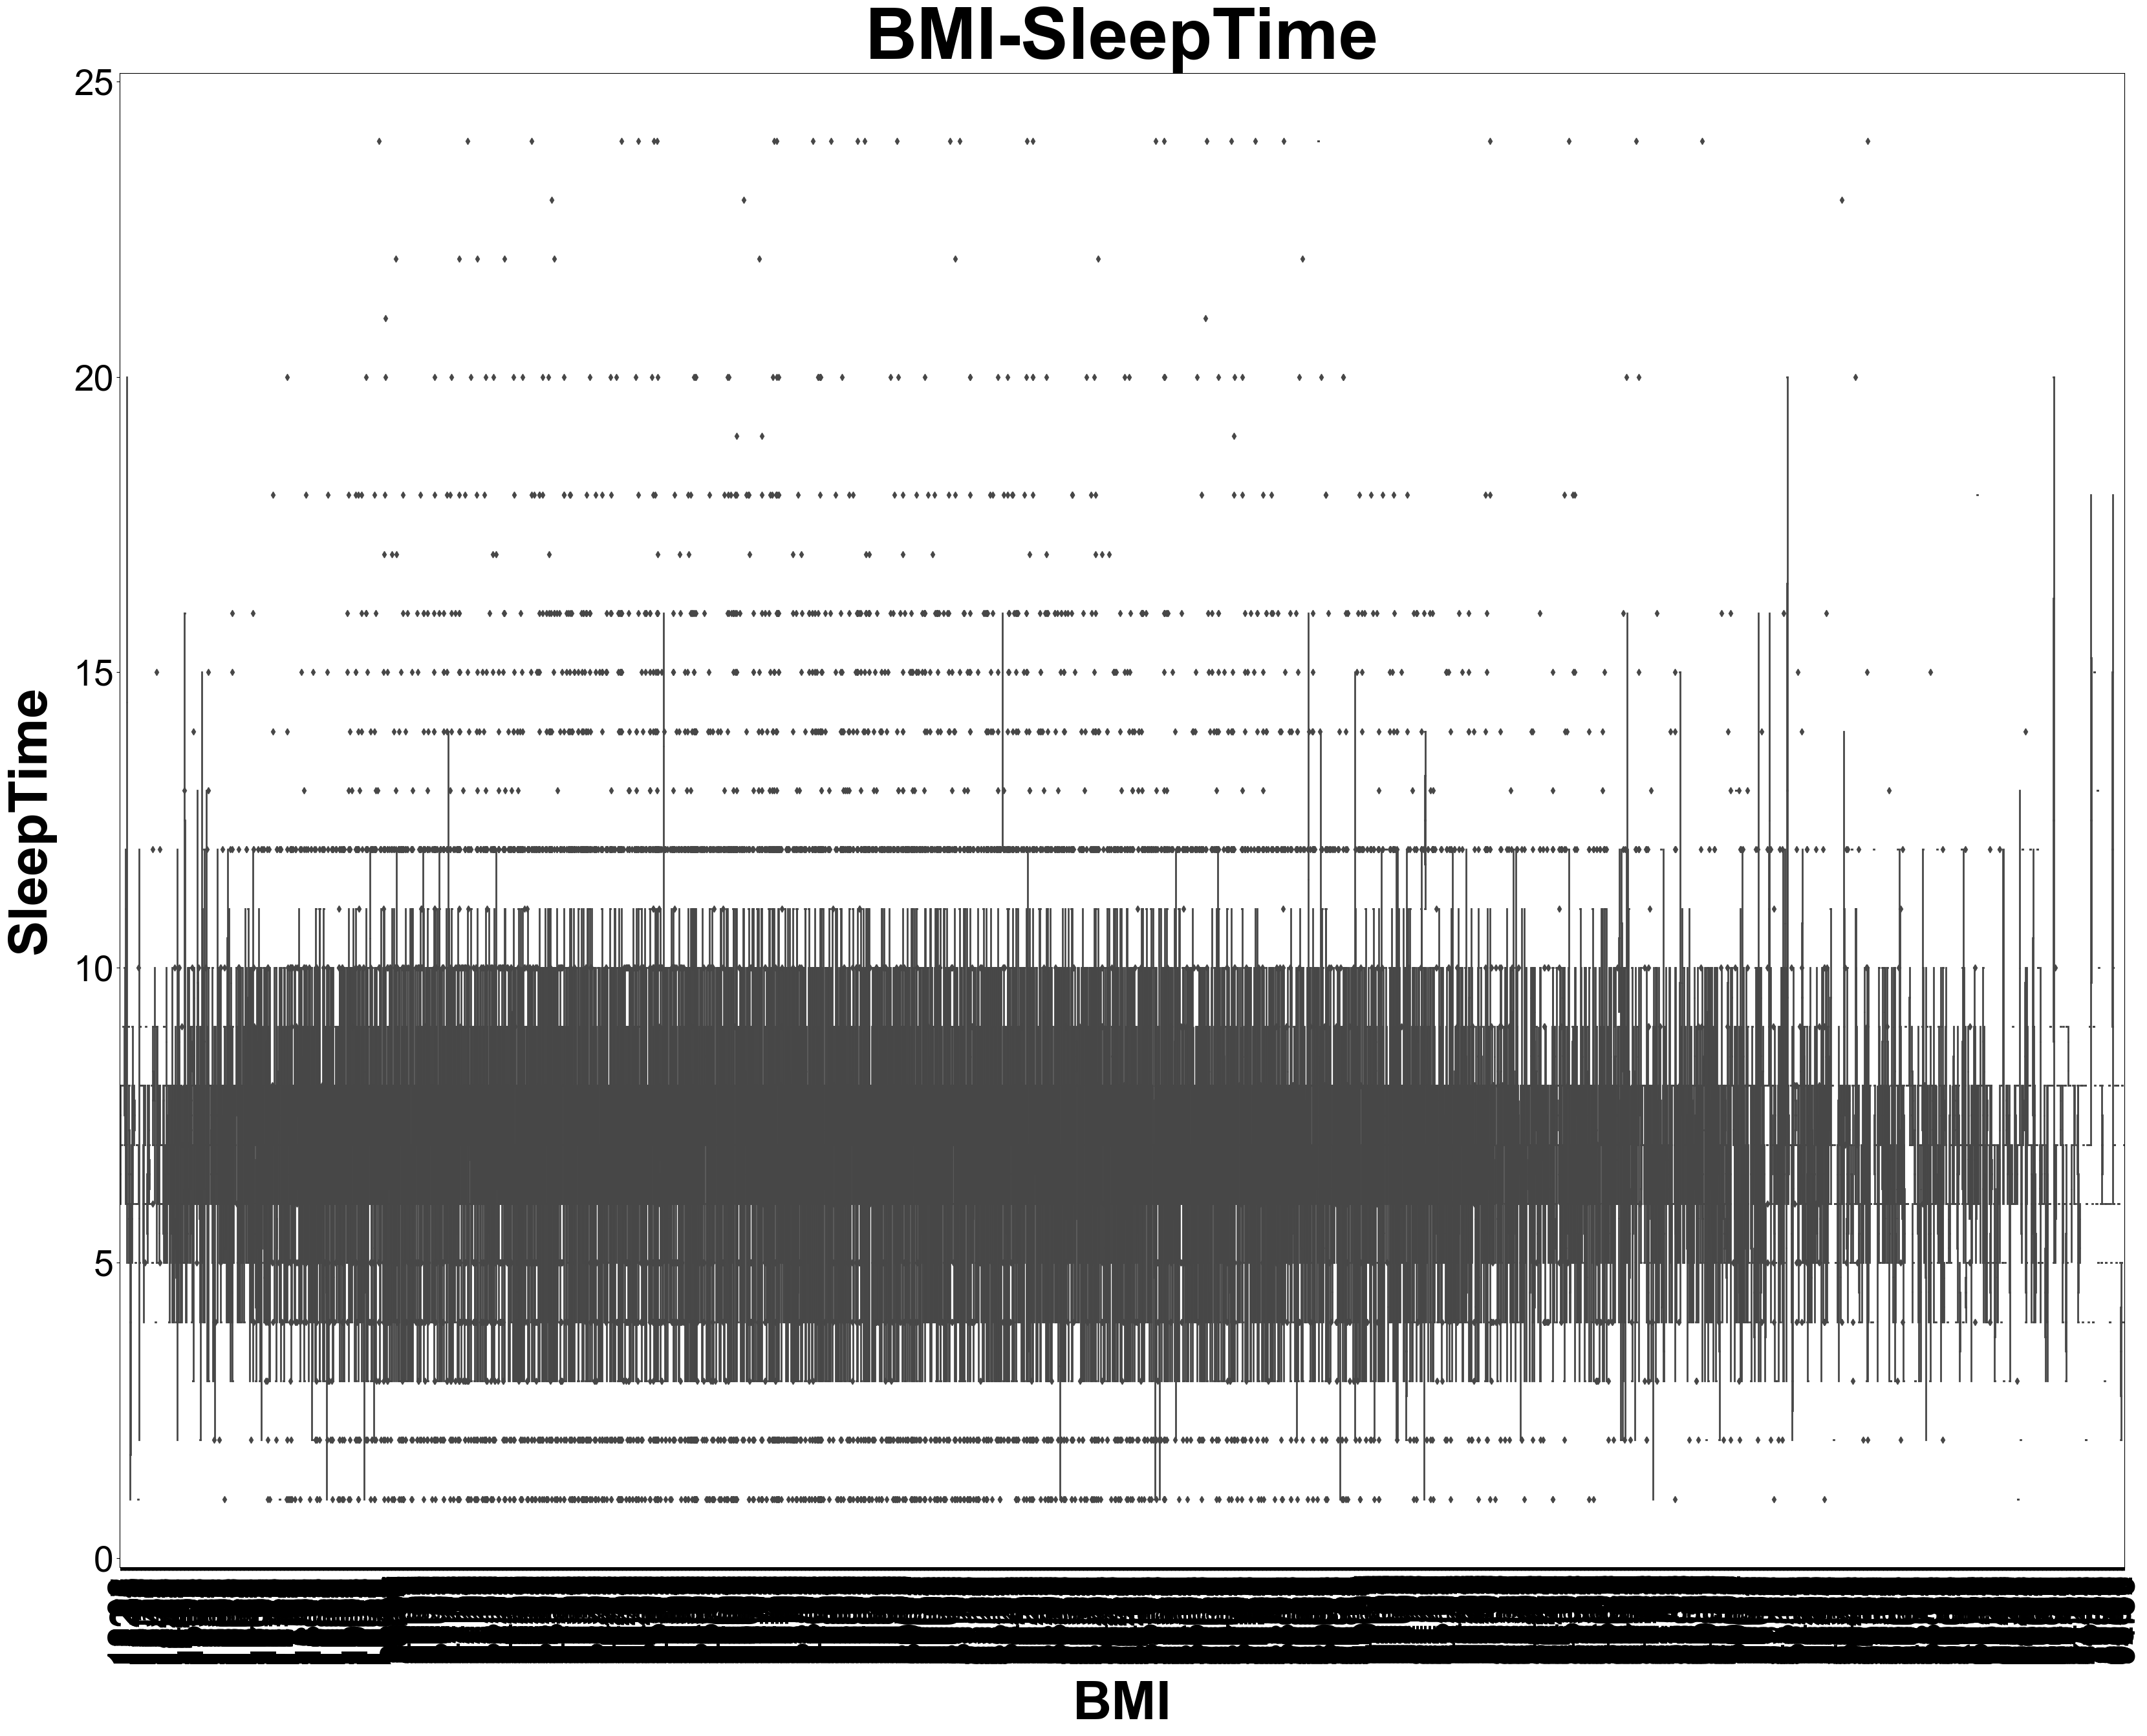

In [16]:
plt.figure(figsize = (40, 30))
sns.boxplot(x = df['BMI'], y = df['SleepTime'], data = df, palette = 'rainbow', width = 0.8, fliersize = 5.0, linewidth = 2.0, whis = 1.5).set_title('BMI-SleepTime', fontsize = 80, fontweight = 'bold', fontname = 'Arial', color = 'black', loc = 'center', pad = 5.0, weight = 'bold')
plt.xlabel('BMI', fontsize = 60, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.ylabel('SleepTime', fontsize = 60, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.xticks(fontsize = 40,fontname = 'Arial', color = 'black', rotation = 90)
plt.yticks(fontsize = 40,fontname = 'Arial', color = 'black')
plt.show()


# Scatter Plot

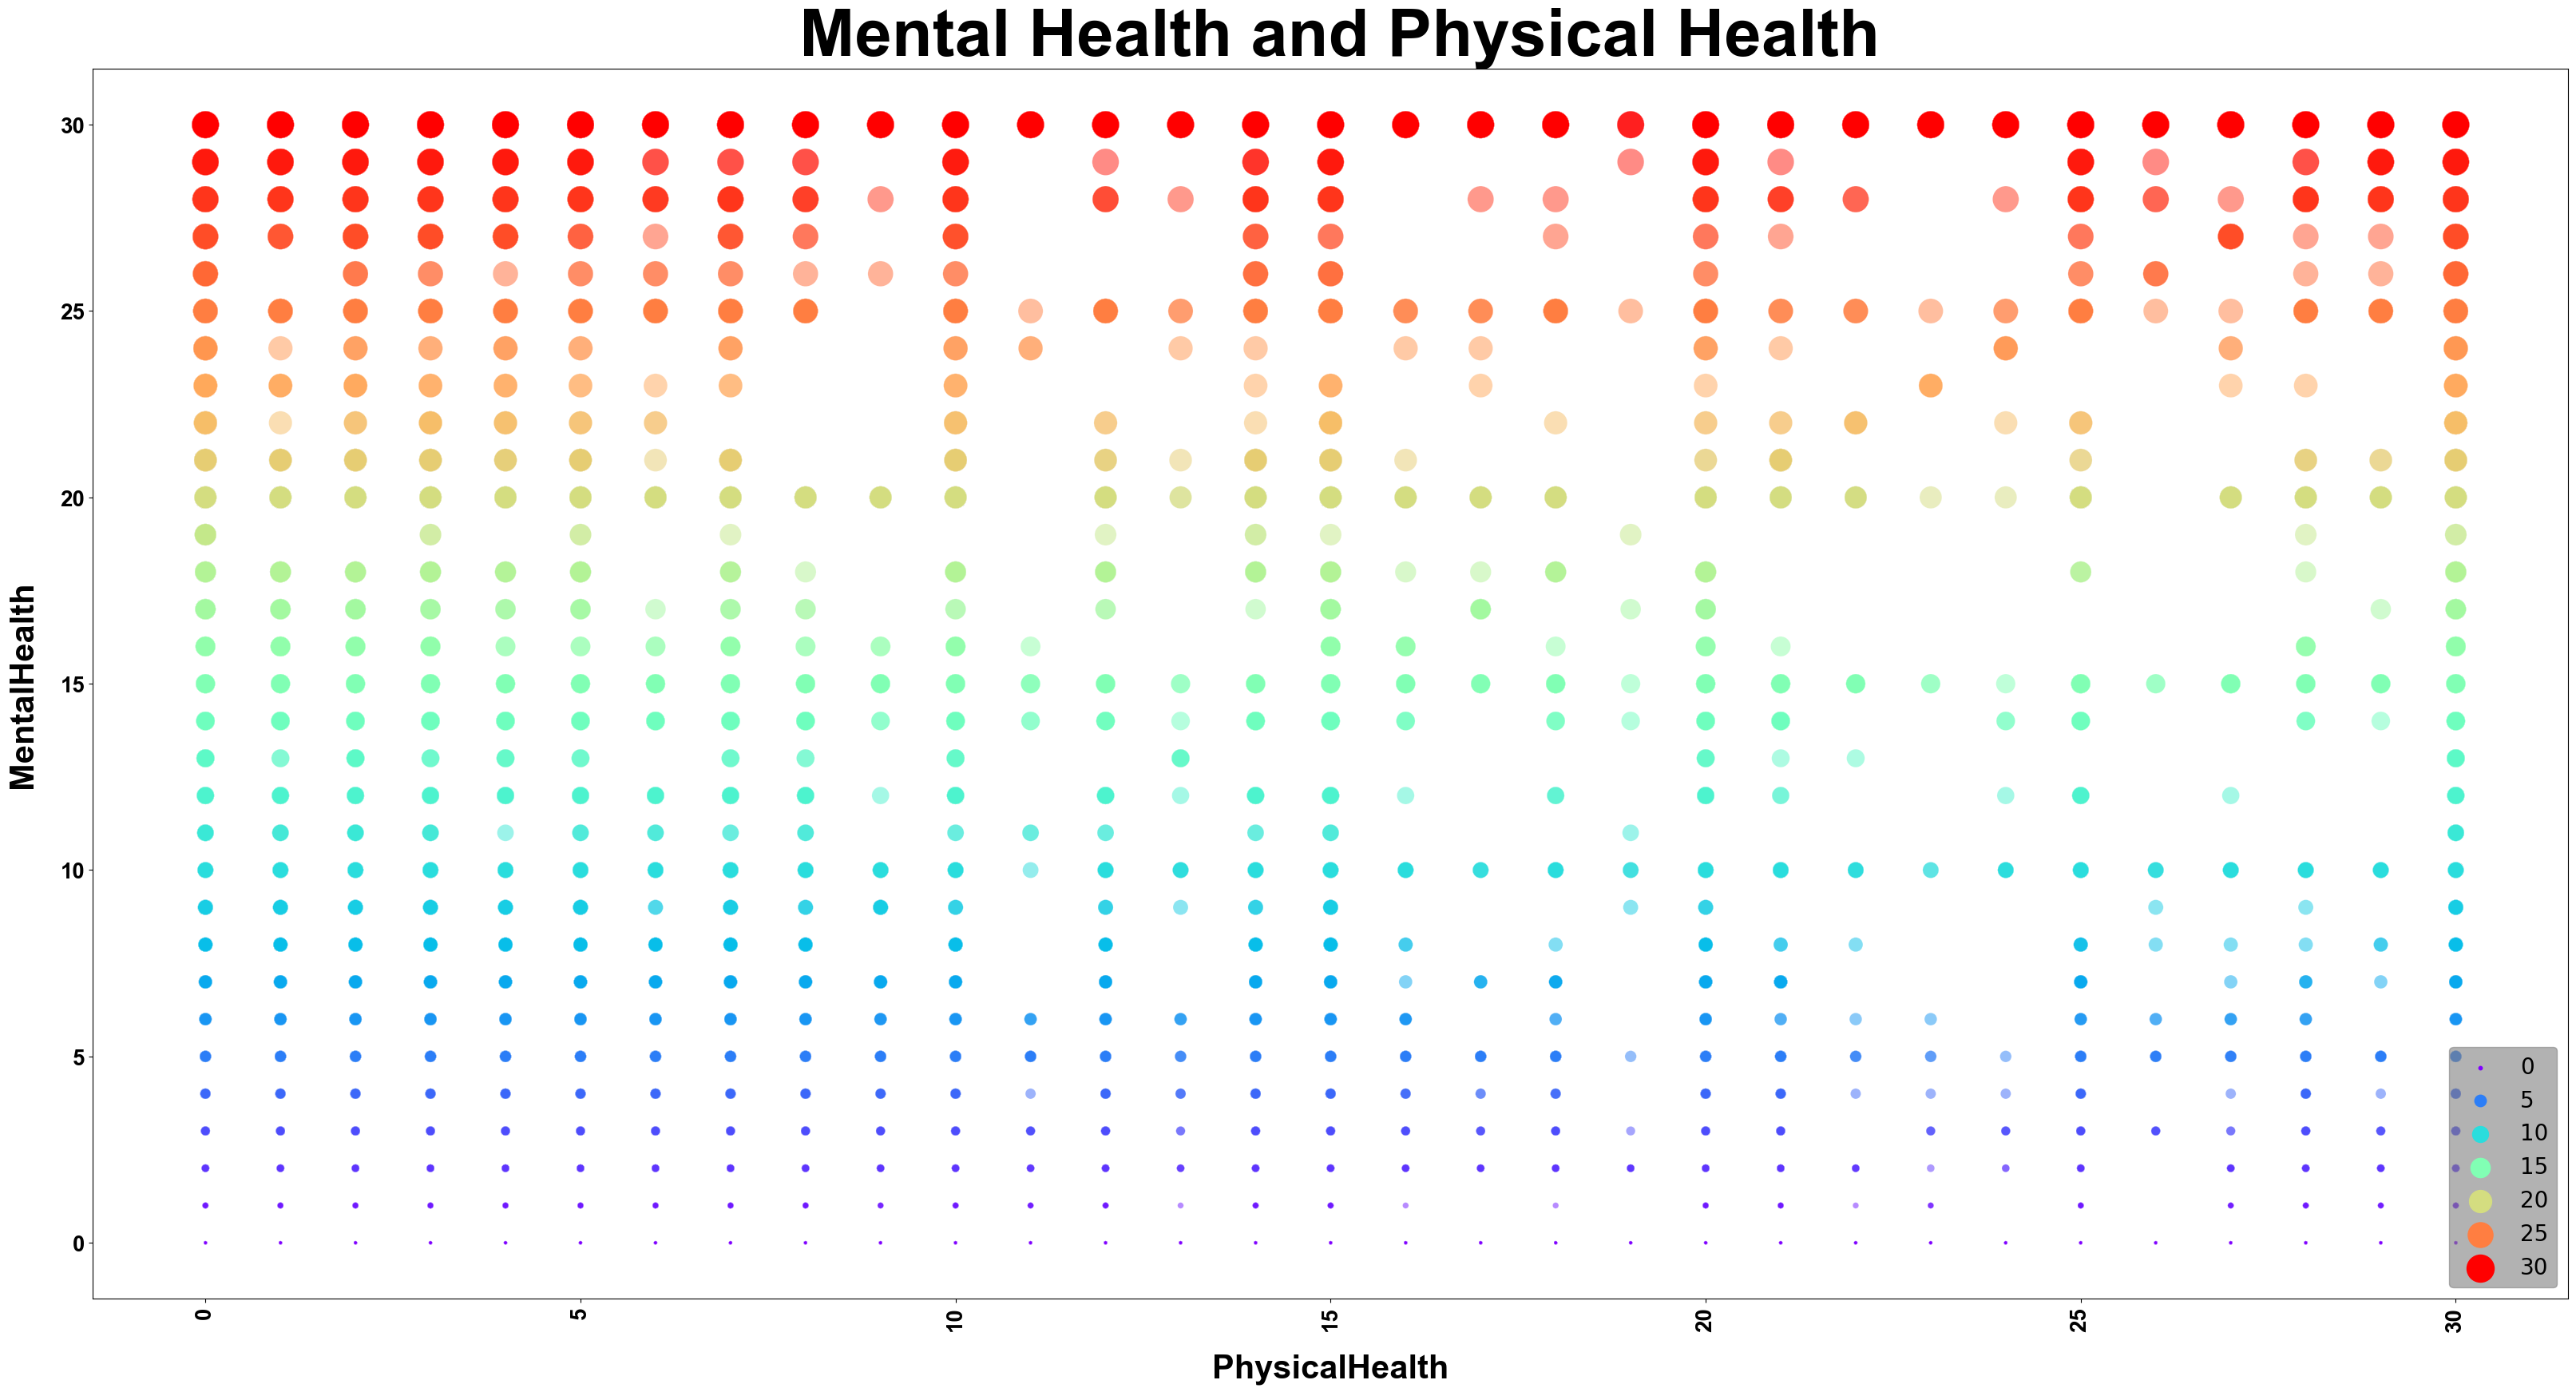

In [17]:
plt.figure(figsize = (40,20))
sns.scatterplot(x = df['PhysicalHealth'], y = df['MentalHealth'], data = df, palette = 'rainbow', hue = df['MentalHealth'], size = df['MentalHealth'], sizes = (10, 600), alpha = 0.5).set_title(' Mental Health and Physical Health',fontsize = 60, fontname = 'Arial', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('PhysicalHealth', fontsize = 30, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.ylabel('MentalHealth', fontsize = 30, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.xticks(fontsize = 20, fontweight = 'bold', fontname = 'Arial', color = 'black', rotation = 90)
plt.yticks(fontsize = 20, fontweight = 'bold', fontname = 'Arial', color = 'black')
plt.legend(loc = 'lower right', fontsize = 20, facecolor = 'gray', edgecolor = 'gray', framealpha = 0.6)
plt.show()

# Hisplot

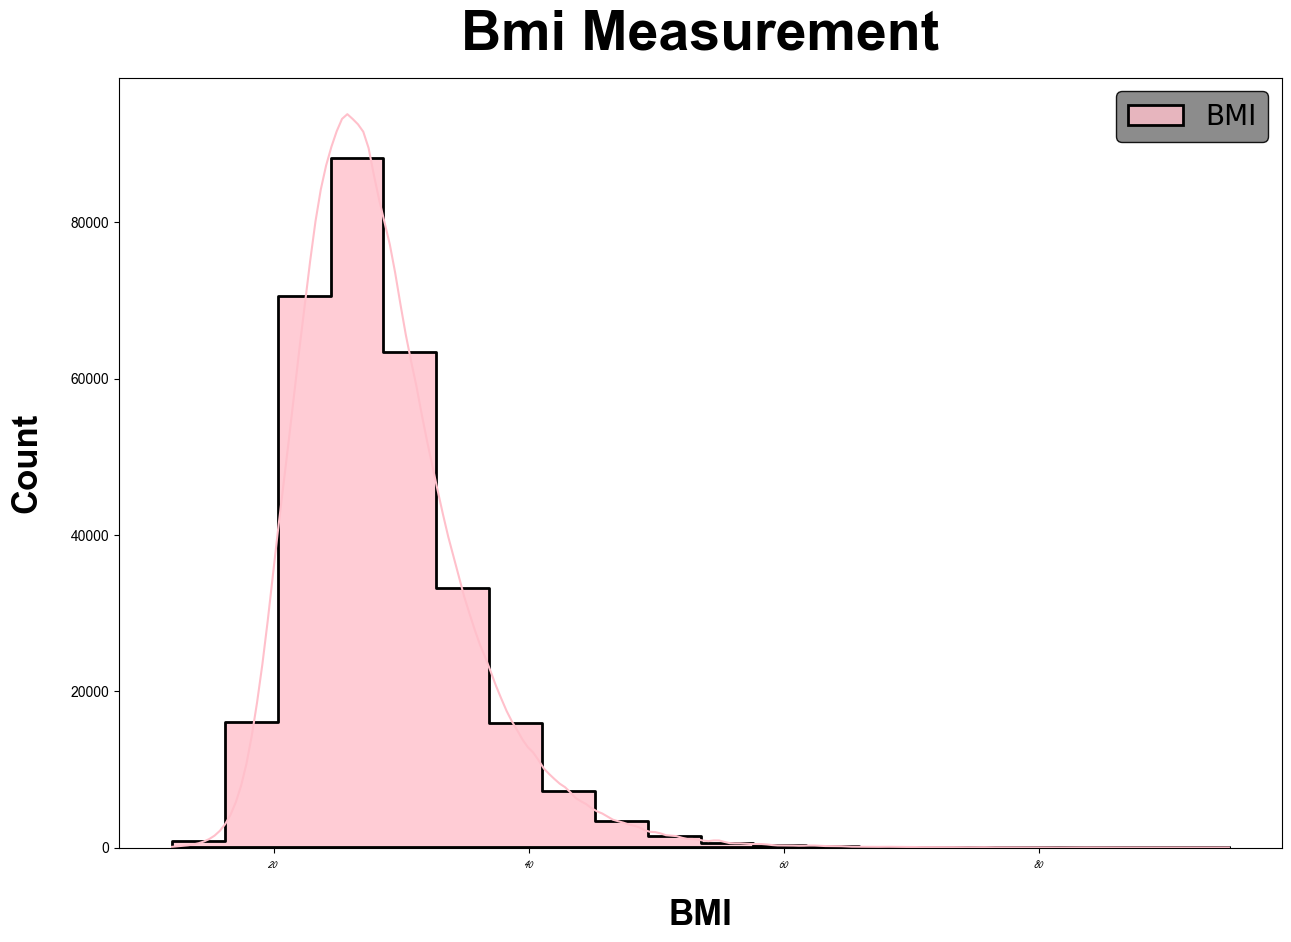

In [18]:
plt.figure(figsize = (15, 10))
sns.histplot(df['BMI'], kde = True, color = 'pink', bins = 20, edgecolor = 'black', linewidth = 2, alpha = 0.8, label = 'BMI', element = 'step', fill = True).set_title('Bmi Measurement', fontsize = 40, fontweight = 'bold', fontname = 'Arial', color = 'black', loc = 'center', pad = 20)
plt.xlabel('BMI', fontsize = 25, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.ylabel('Count', fontsize = 25, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 20)
plt.xticks(fontsize = 10,fontname = 'Freestyle Script', color = 'black')
plt.yticks(fontsize = 10,fontname = 'Arial', color = 'black')
plt.legend(loc = 'upper right', fontsize = 20, facecolor = 'gray', edgecolor = 'black', framealpha = 0.9)
plt.show()

# Heatmap

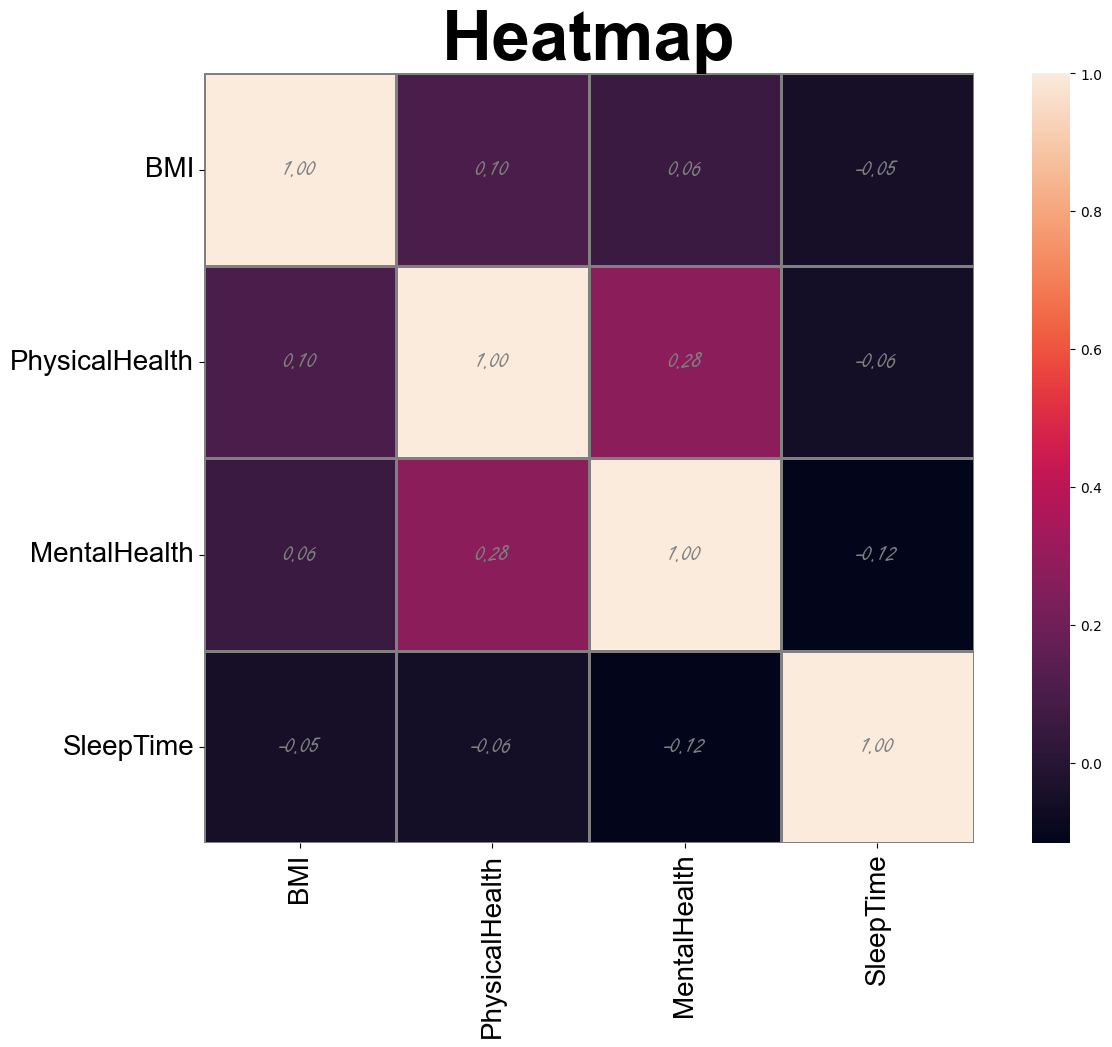

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(numeric_only = True),annot = True, linewidth = 2.0, linecolor = 'gray', annot_kws = {'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Freestyle Script', 'color': 'gray'}, fmt = '.2f', cbar = True, square = True).set_title('Heatmap', fontsize = 50, fontweight = 'bold', fontname = 'Arial', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xticks(fontsize = 20,fontname = 'Arial', color = 'black', rotation = 90)
plt.yticks(fontsize = 20,fontname = 'Arial', color = 'black', rotation = 0)
plt.show()

# Min-Max Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mm = MinMaxScaler(feature_range = (0, 1))

In [22]:
df['BMI'] = mm.fit_transform(df[['BMI']])
df['PhysicalHealth'] = mm.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = mm.fit_transform(df[['MentalHealth']])
df['SleepTime'] = mm.fit_transform(df[['SleepTime']])

In [23]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.175782,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.147169,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.141132,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No


# Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
for col in df.columns:
    if is_num(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [27]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,4,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,4,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,4,0.304348,0,0,0


# Spliting Datasets

In [28]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

# #Over Sampling

In [29]:
ag = RandomOverSampler(random_state = 50)

In [30]:
y.value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [31]:
ag_x, ag_y = ag.fit_resample(x, y)

In [32]:
ag_y.value_counts()

HeartDisease
0    274456
1    274456
Name: count, dtype: int64

# Stratified KFold Cross Validation

In [33]:
xtrain, xtest, ytrain, ytest = tts(ag_x, ag_y, test_size = 0.3, random_state = 50)

In [34]:
st = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

In [35]:
for xtrain_index, xtest_index in st.split(ag_x,ag_y):
    xtrain, xtest = ag_x.iloc[xtrain_index], ag_x.iloc[xtest_index]
    ytrain, ytest = ag_y.iloc[xtrain_index], ag_y.iloc[xtest_index]

# Handling Class Imbalance

In [36]:
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [37]:
not_heart_disease = (274456 / (27261 + 274456)) * 100
yes_heart_disease = (27261 / (27261 + 274456)) * 100
print('Not Heart Disease: {} percent of total people.'.format(not_heart_disease))
print('Suffering from Heart Disease: {} percent of total people.'.format(yes_heart_disease))

Not Heart Disease: 90.96471196518591 percent of total people.
Suffering from Heart Disease: 9.03528803481408 percent of total people.


# Select K Best

In [38]:
from sklearn.feature_selection import SelectKBest

In [39]:
from sklearn.feature_selection import f_classif as fcf

In [40]:
skb = SelectKBest(score_func = fcf)

In [41]:
feature_score = skb.fit(ag_x, ag_y)

In [42]:
feature_score.scores_

array([  3516.24746924,  18420.54916791,   2534.21463512,  30373.19057072,
        31569.73055078,    616.71401924,  46960.15544102,   9560.54157166,
       132576.53273553,   3340.70510221,  34460.62207005,  12888.62352158,
          277.03489871,    154.02427584,   1868.30146544,  18079.9721661 ,
        10521.23766089])

In [43]:
col1 = pd.DataFrame(feature_score.scores_, columns = ['Feature Score'])
col2 = pd.DataFrame(ag_x.columns, columns = ['Feature Name'])
score = pd.concat([col1, col2], axis = 1)
score

,Feature Score,Feature Name
0,3516.247469,BMI
1,18420.549168,Smoking
2,2534.214635,AlcoholDrinking
3,30373.190571,Stroke
4,31569.730551,PhysicalHealth
5,616.714019,MentalHealth
6,46960.155441,DiffWalking
7,9560.541572,Sex
8,132576.532736,AgeCategory
9,3340.705102,Race


In [44]:
score_sort = score.sort_values(by = 'Feature Score', ascending = False)
score_sort

,Feature Score,Feature Name
8,132576.532736,AgeCategory
6,46960.155441,DiffWalking
10,34460.622070,Diabetic
4,31569.730551,PhysicalHealth
3,30373.190571,Stroke
1,18420.549168,Smoking
15,18079.972166,KidneyDisease
11,12888.623522,PhysicalActivity
16,10521.237661,SkinCancer
7,9560.541572,Sex


In [45]:
score_sort.head(5)

,Feature Score,Feature Name
8,132576.532736,AgeCategory
6,46960.155441,DiffWalking
10,34460.622070,Diabetic
4,31569.730551,PhysicalHealth
3,30373.190571,Stroke


In [46]:
ag_x = ag_x[['AgeCategory']]

In [47]:
ag_x.head()

,AgeCategory
0,7
1,12
2,9
3,11
4,4


In [48]:
xtrain, xtest, ytrain, ytest = tts(ag_x, ag_y, test_size = 0.3, random_state = 50)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log = LogisticRegression()

In [51]:
log.fit(xtrain, ytrain)

LogisticRegression()

In [52]:
log_pred = log.predict(xtest)
log_pred

array([0, 0, 1, ..., 1, 0, 1])

In [53]:
log_acc = acc(ytest, log_pred)
log_acc

0.6879592406815891

# Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [57]:
rf_pred = rf.predict(xtest)
rf_pred

array([0, 0, 1, ..., 1, 0, 1])

In [58]:
rf_acc = acc(ytest, rf_pred)
rf_acc

0.6879592406815891

# Bernoulli Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import BernoulliNB

In [60]:
bn = BernoulliNB()

In [61]:
bn.fit(xtrain, ytrain)

BernoulliNB()

In [62]:
bn_pred = bn.predict(xtest)
bn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
bn_acc = acc(ytest, bn_pred)
bn_acc

0.5329742400136026

# Gaussian Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gn = GaussianNB()

In [66]:
gn.fit(xtrain, ytrain)

GaussianNB()

In [67]:
gn_pred = gn.predict(xtest)
gn_pred

array([0, 0, 1, ..., 1, 0, 1])

In [68]:
gn_acc = acc(ytest, gn_pred)
gn_acc

0.6879592406815891

# Multinomial Naive Bayes Classifier

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
mn = MultinomialNB()

In [71]:
mn.fit(xtrain, ytrain)

MultinomialNB()

In [72]:
mn_pred = mn.predict(xtest)
mn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
mn_acc = acc(ytest, mn_pred)
mn_acc

0.49929557792972784

# K-Nearest Neighbors Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [78]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 0, 1, ..., 1, 0, 0])

In [79]:
knn_acc = acc(ytest, knn_pred)
knn_acc

0.6636627518612531

# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt = DecisionTreeClassifier()

In [82]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [83]:
dt_pred = dt.predict(xtest)
dt_pred

array([0, 0, 1, ..., 1, 0, 1])

In [84]:
dt_acc = acc(ytest, dt_pred)
dt_acc

0.6879592406815891

# Model Selection

In [85]:
compare_acc = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'K Nearest Neighbors', 'Decision Tree'], 'Accuracy': [log_acc, rf_acc, bn_acc, gn_acc, mn_acc, knn_acc, dt_acc]})
compare_acc

,Model,Accuracy
0,Logistic Regression,0.687959
1,Random Forest,0.687959
2,Bernoulli Naive Bayes,0.532974
3,Gaussian Naive Bayes,0.687959
4,Multinomial Naive Bayes,0.499296
5,K Nearest Neighbors,0.663663
6,Decision Tree,0.687959


In [86]:
compare_acc_sort = compare_acc.sort_values(by = 'Accuracy', ascending = False)
compare_acc_sort

,Model,Accuracy
0,Logistic Regression,0.687959
1,Random Forest,0.687959
3,Gaussian Naive Bayes,0.687959
6,Decision Tree,0.687959
5,K Nearest Neighbors,0.663663
2,Bernoulli Naive Bayes,0.532974
4,Multinomial Naive Bayes,0.499296


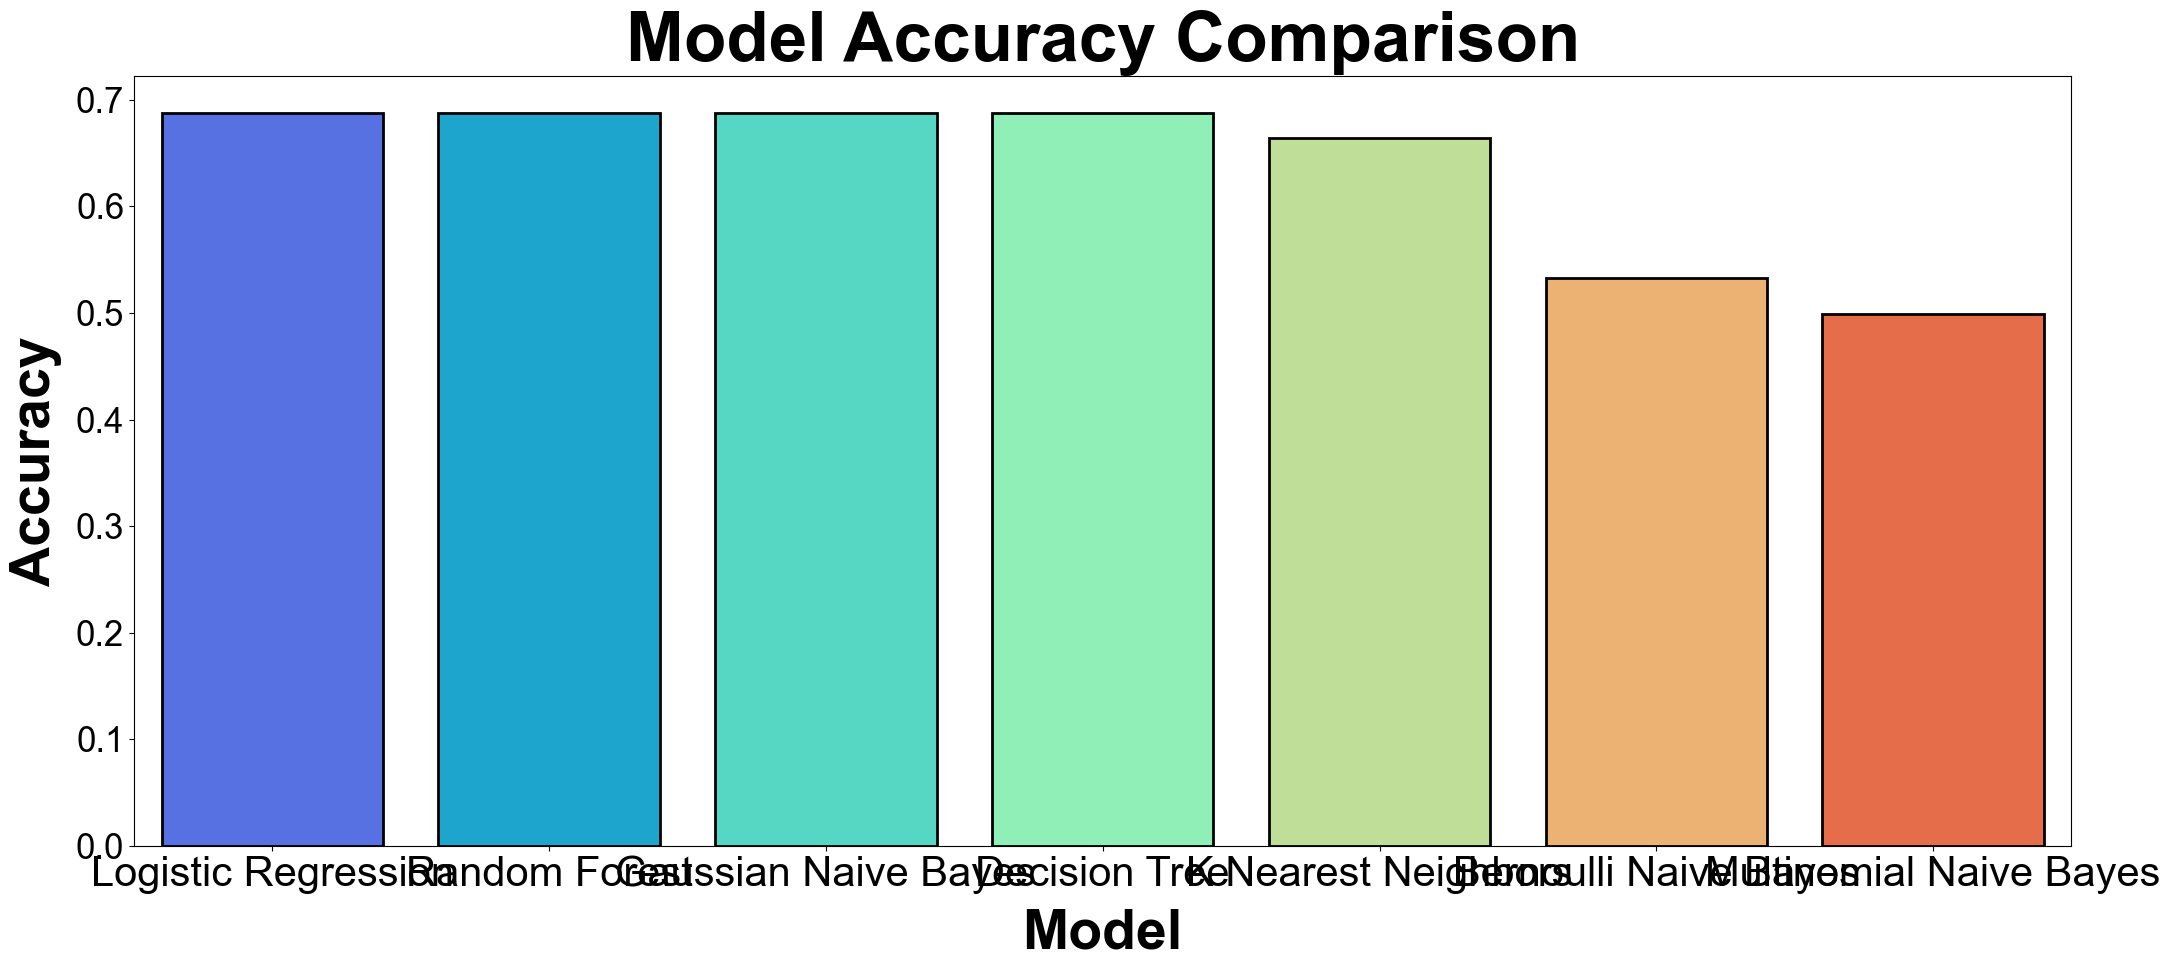

In [94]:
plt.figure(figsize = (25, 10))
sns.barplot(x = 'Model', y = 'Accuracy', data = compare_acc_sort, palette = 'rainbow', edgecolor = 'black', linewidth = 2.0).set_title('Model Accuracy Comparison', fontsize = 50, fontweight = 'bold', fontname = 'Arial', color = 'black', loc = 'center', pad = 10.0, weight = 'bold')
plt.xlabel('Model', fontsize = 40, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 10.0)
plt.ylabel('Accuracy', fontsize = 40, fontweight = 'bold', fontname = 'Arial', color = 'black', labelpad = 10.0)
plt.xticks(fontsize = 30,  fontname = 'Arial', color = 'black', rotation = 0)
plt.yticks(fontsize = 25, fontname = 'Arial', color = 'black', rotation = 0)
plt.show()

# Gradio and Model

In [88]:
import joblib as jb

In [89]:
jb.dump(rf, 'heart_disease_model')

['heart_disease_model']

In [90]:
model = jb.load('heart_disease_model')

In [91]:
import gradio as gr

In [92]:
def predict_heart_disease(nm_x):
    HeartDisease = model.predict([[nm_x]])
    return HeartDisease

In [93]:
interface = gr.Interface(
    fn = predict_heart_disease,
    inputs = ['number'],
    outputs = ['number']
).launch(share = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
